## This Document is for the Sonnenuntergang project in Image Quality & Perception

### Members: Matti, Christian, Bozhidar, Iliya

#### First import Python Imaging Library (Pillow)

In [2]:
from PIL import Image, ImageEnhance

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import math
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
import os
import errno
#These are used to force path creation in case of not already existing path when saving

In [18]:
#im1 = Image.open("im1.jpg")

In [6]:
#enhancer = ImageEnhance.Brightness(im)

In [7]:
#Note: Should we crop all images to the same size?

In [8]:
def show(img):
    imshow(np.asarray(img))

In [9]:
#Takes multiple arguments and converts them to a list
def showAll(*imgs):
    columns = 3
    #Calculate amount of rows based on number of columns
    rows = math.ceil(len(imgs)/columns)
    #print(rows)
    #Create figure
    fig = plt.figure(figsize=(columns*5.5,rows*3.5))
    for i in range(0,len(imgs)):
        img = imgs[i]
        fig.add_subplot(rows, columns, i+1)
        show(img)

In [10]:
#Takes enhancer and factors as input and SAVES ENHANCED IMAGES IN A LIST
def variate(enhancer, factors=[1,0.5,1.5]):
    n=len(factors)
    res=[]
    for i in range(0,n):
        res += [enhancer.enhance(factors[i])]
    return res

In [11]:
# brValues = [0.75,0.85,0.9,1,1.15,1.27] #Brightness Values
# #contrValues = [0.85,1,1.15,1.25, 1.4, 1.6] #Contrast Values
# contrValues = [0.75,0.87,1,1.15,1.25, 1.45] #Contrast Values
# satValues = [0.75,0.9,1,1.2,1.4,1.6] #Saturation Values
#Final values:
brValues = [0.7,0.85,1,1.15,1.3, 1.45] #0.15 Schritte
contrValues = [0.7,0.85,1,1.15,1.3, 1.45] #0.15 Schritte
satValues = [0.75,0.9,1,1.2,1.4,1.6] #Angepasst

vals = [brValues, contrValues, satValues]
names = ["Brightness", "Contrast", "Saturation"]
#print(vals)

def variateEverything(image):
    brEnh = ImageEnhance.Brightness(image)
    conEnh = ImageEnhance.Contrast(image)
    satEnh = ImageEnhance.Color(image)
    enh=[brEnh,conEnh,satEnh]
    for i in range(0,len(enh)):
        var = variate(enh[i],vals[i])
        showAll(*var)
    
    

In [11]:
def save(img,path):
    #filename="./images/test/changed-image.jpg"
    filename=path
    #Force path creation in case of not already existing path
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
    #Resize image to make it compatible with MLDS script
    w = int(img.size[0]*0.32)
    h = int(img.size[1]*0.32)
    img = img.resize((w,h), Image.ANTIALIAS)            
    img.save(filename) #If jpg doesnt work try png
    
def convertVal(val):
    s = str(val)
    return s.replace(".","_")

#Takes imgs as list, imageLabel for example "im1", enhancerLabel for example "brightness", values - the different values
def saveAll(imgs,imageLabel,enhancerLabel,values):
    if (len(imgs)!=len(values)):
        print("Error, images are not in same amount as values!")
        return
    for i in range(0,len(imgs)):
        valString = convertVal(values[i]) #Need to convert for example 1.6 to 1_6 to be able to save
        path = "./images/"+imageLabel+"/"+imageLabel+"-"+enhancerLabel+"-"+valString+".png" #Argue why png and not .jpg
        print(path)
        save(imgs[i],path)
    
def saveEverything(image):
    brEnh = ImageEnhance.Brightness(image)
    conEnh = ImageEnhance.Contrast(image)
    satEnh = ImageEnhance.Color(image)
    enh=[brEnh,conEnh,satEnh]
    enhLabels = ["br","con","sat"]
    for i in range(0,len(enh)):
        filename = image.filename[0:3] #Drop .jph #Only properl works for 1-9 images
        var = variate(enh[i],vals[i])
        saveAll(var,image.filename[0:3], enhLabels[i],vals[i])

In [12]:
#factor = 1 #gives original image
#im_output = enhancer.enhance(factor)
#im_output.save('original-image.png')
#im0 = enhancer.enhance(factor)
#show(im0)

#factor = 0.5 #darkens the image
#im1 = enhancer.enhance(factor)
#im_output.save('darkened-image.png')
#show(im1)

#factor = 1.5 #brightens the image
#im2 = enhancer.enhance(factor)
#show(im2)
#show(im) #Original image is not changed when using an enhancer
#showAll(im0,im1,im2)
#im1.filename[0:3]
#save(im1, "./images/im1/testOriginal.jpg")
#convertVal(1.5)
#saveEverything(im1)


## Die folgenden Zeilen können benutzt werden um mit den Values rumzuprobieren

In [13]:
#im1 = Image.open("im1.jpg")
#variateEverything(im1)
#saveEverything(im1)

In [14]:
#im2 = Image.open("im2.jpg")
#variateEverything(im2)
#saveEverything(im2)

In [15]:
#im3 = Image.open("im3.jpg")
# variateEverything(im3)
#saveEverything(im3)

In [16]:
#im4 = Image.open("im4.jpg")
# variateEverything(im4)
#saveEverything(im4)

In [17]:
#im5 = Image.open("im5.jpg")
# variateEverything(im5)
#saveEverything(im5)

In [18]:
#im6 = Image.open("im6.jpg")
# variateEverything(im6)
#saveEverything(im6)

In [19]:
#im7 = Image.open("im7.jpg")
# variateEverything(im7)
#saveEverything(im7)

In [13]:
def readAllImages():
    images = []
    for i in range(1,7):
        path = "im"+str(i)+".jpg"
        img = Image.open(path)
        images += [img]
    return images

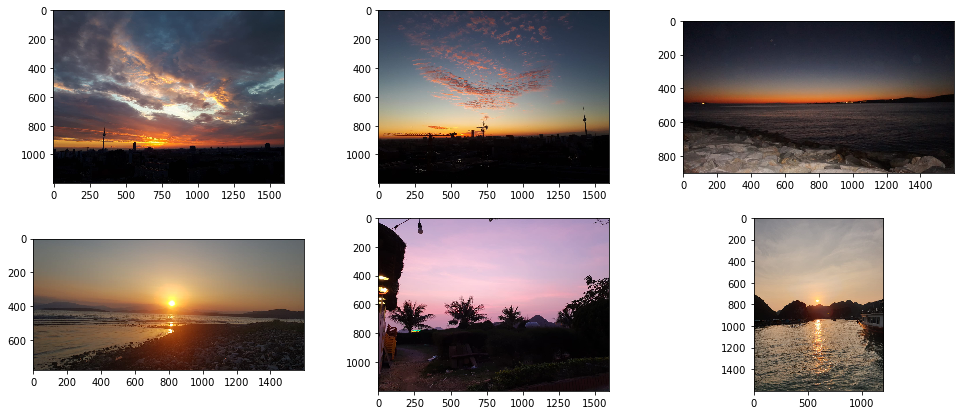

In [14]:
images = readAllImages()
#showAll(*images) #Vielleicht sollten wir das dritte Bild ändern?

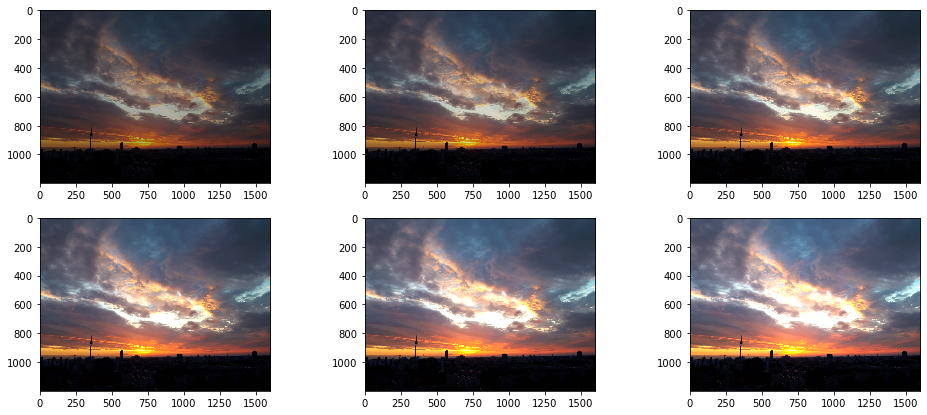

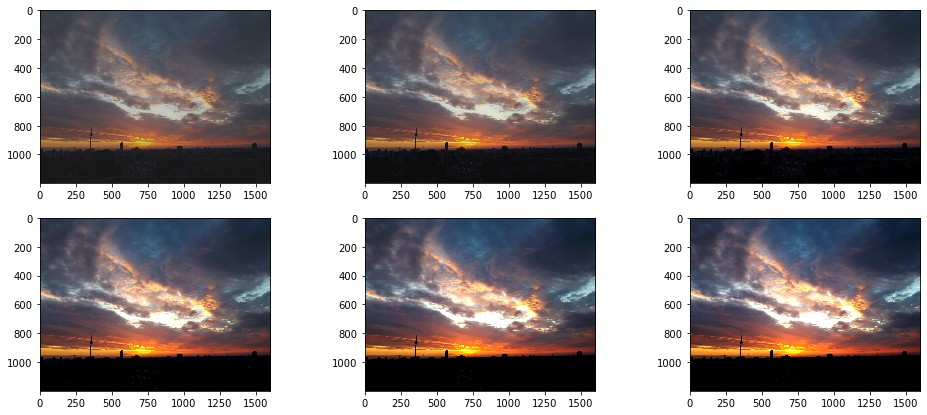

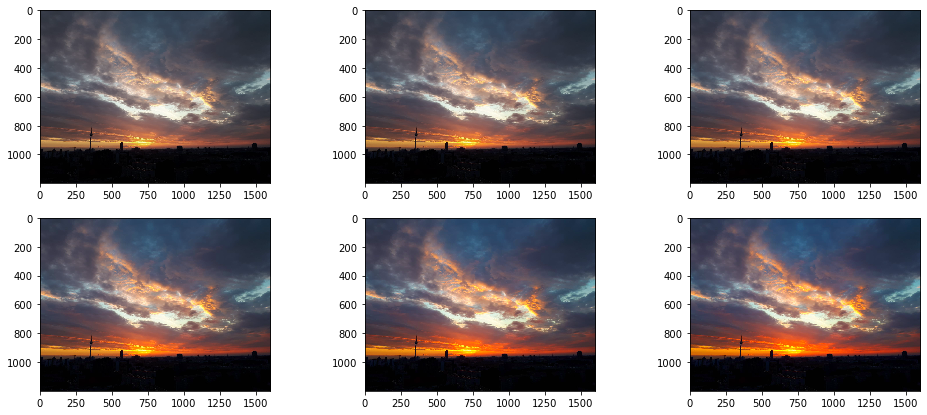

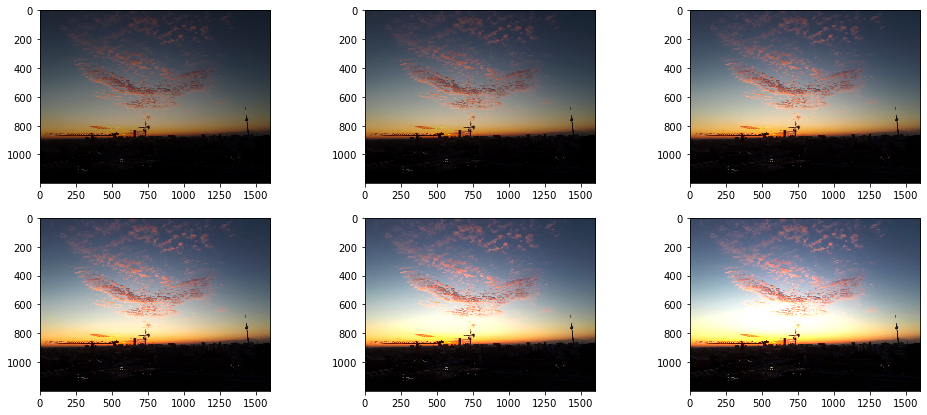

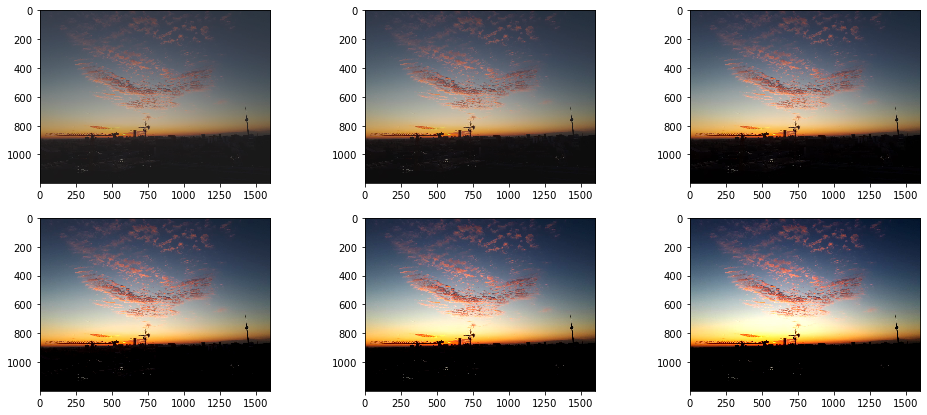

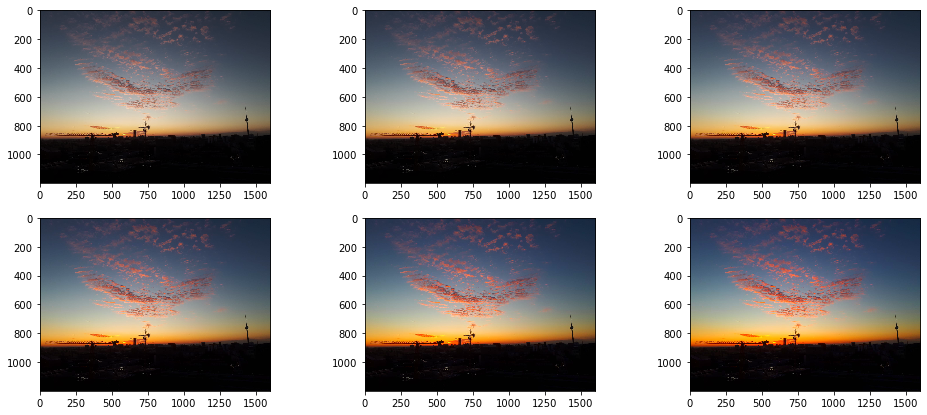

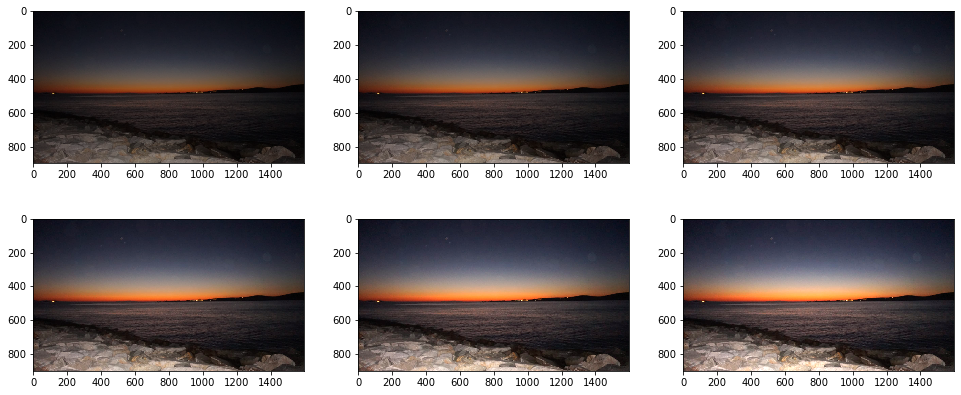

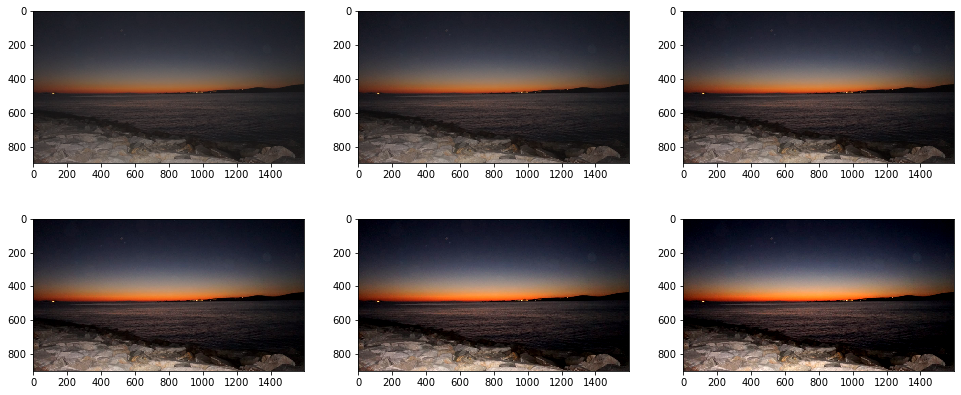

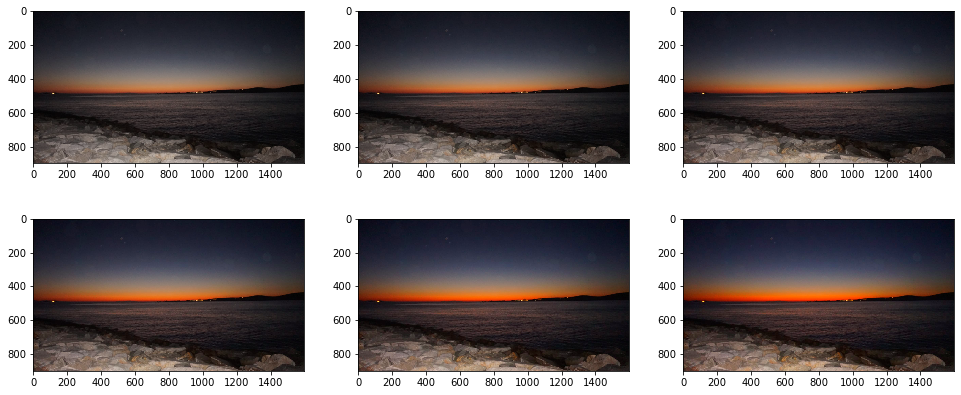

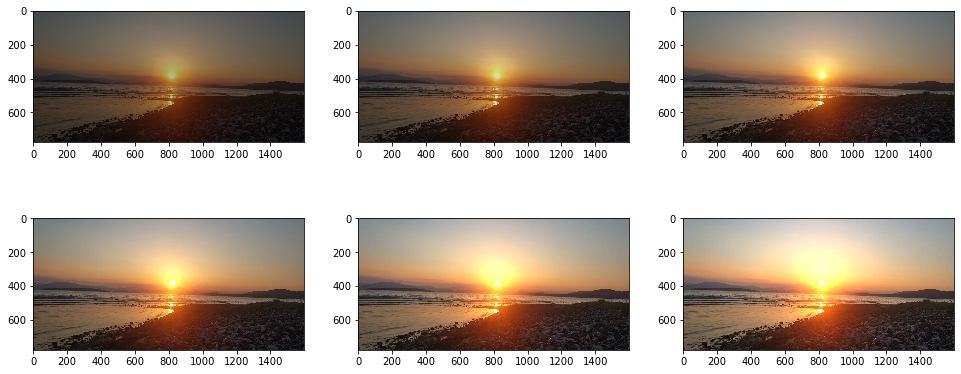

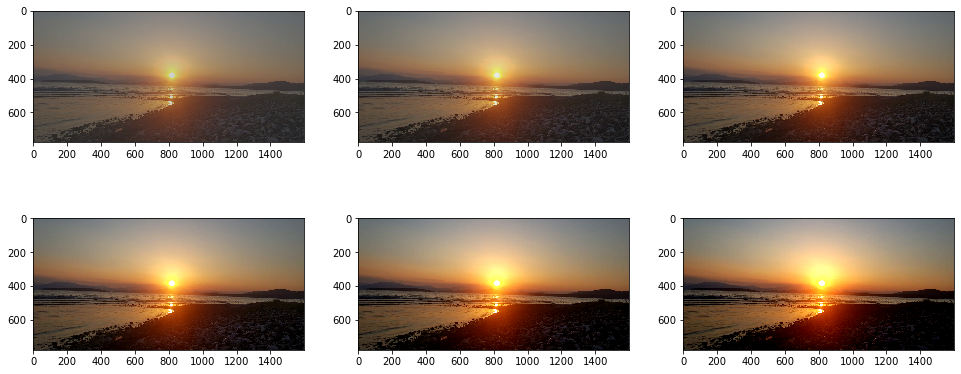

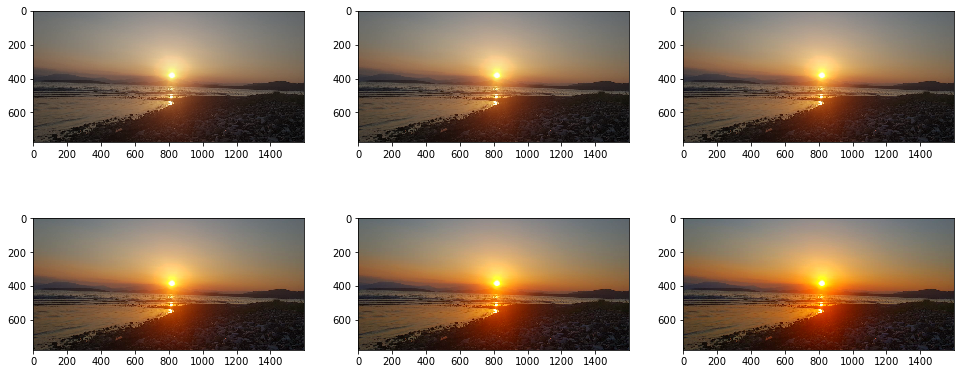

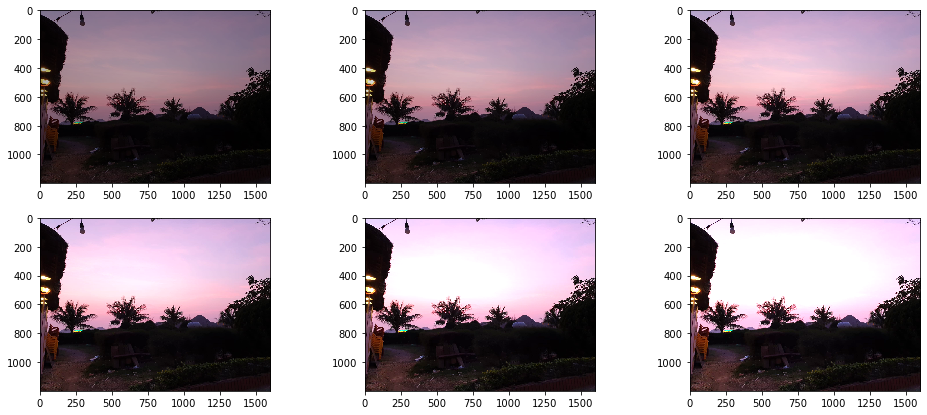

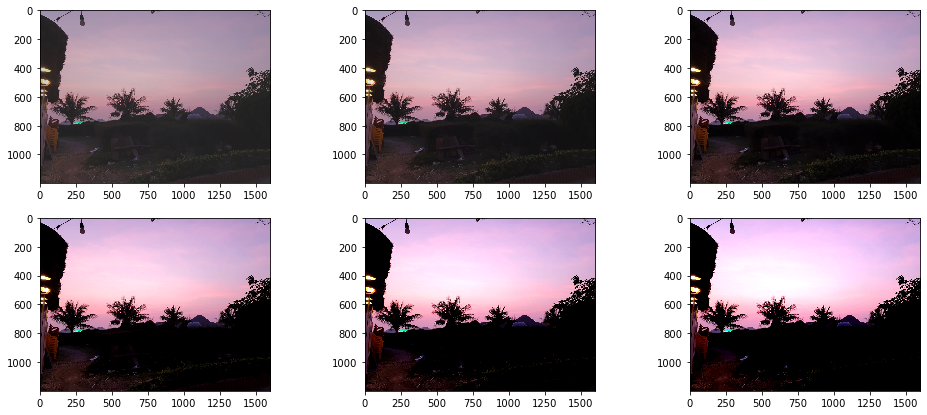

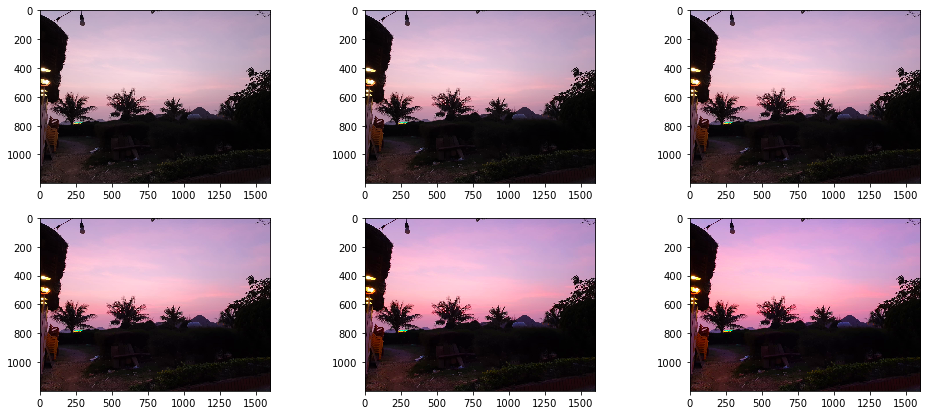

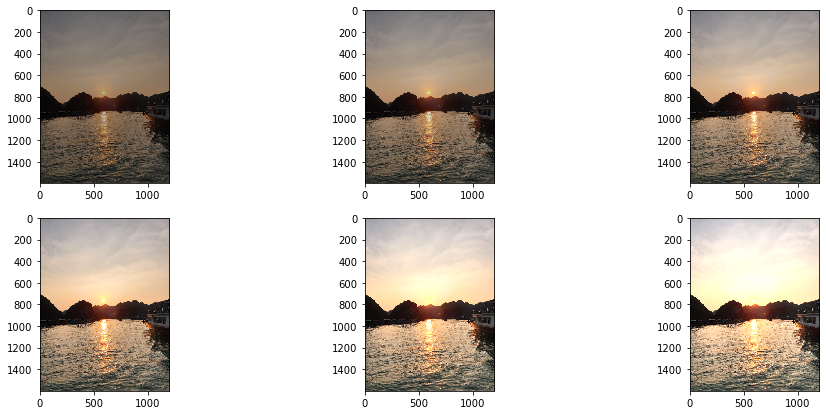

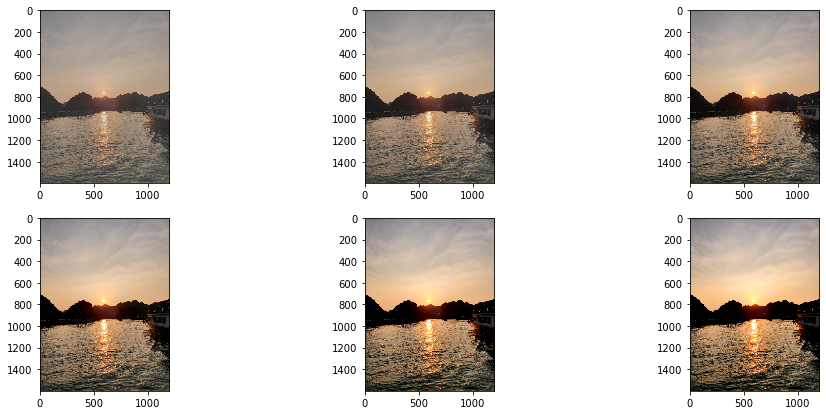

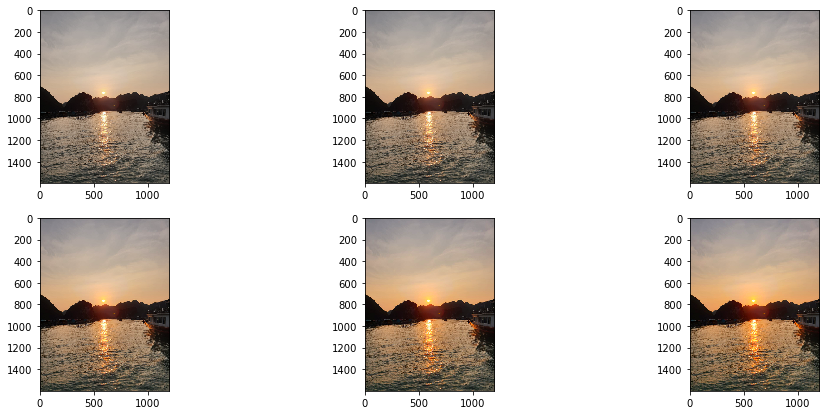

In [16]:
#Create all data:
images = readAllImages()
for img in images:
#     saveEverything(img)
    variateEverything(img)

## How to run the script:

### run("im1", "Ben")   --> Runs the script for image 1, variating all parameters one by one, for Ben
#### This will automatically run MLDS 3 times, you simply have to wait for it to do its thing
#### You can also <font color='green'>change the default name</font> in the definition of run, so you can simply write run("im1) instead

In [23]:
import subprocess

In [24]:
choices = ["br", "con", "sat"]
def run(img, name="Chris"): #You can change the default name so you don't have to write it everytime
    for ch in choices:
#         subprocess.call(['python', 'MLDS_triads.py', img, ch,"Chris"])
        subprocess.call(['python', 'Alternative_ordinal_rating.py', img, ch,name])

# Don't forget! <font color='red'>Only run MLDS on a picture if you already have the raw data saved, or there will be a terrible crash!</font>

In [25]:
choices = ["br", "con", "sat"] #Calling choices
imgs = ["im1","im2","im3","im4","im5","im6"] #Image choices
name = "Chris"

In [31]:
run("im1", "Chris") #Third run already completed

In [26]:
def runForAllImages(name):
    for im in imgs:
        run(im, name)

In [27]:
# runForAllImages("Chris")